In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.heterodyne
reload(kid_readout.roach.heterodyne)

<module 'kid_readout.roach.heterodyne' from '/home/gjones/readout/kid_readout/kid_readout/roach/heterodyne.pyc'>

In [3]:
import kid_readout.utils.sweeps

In [4]:
512e6/2**16

7812.5

In [5]:
78125/1e6

0.078125

In [6]:
1/_

12.8

In [7]:
1e6/128.

7812.5

In [8]:
np.arange(-64,64)/128.

array([-0.5      , -0.4921875, -0.484375 , -0.4765625, -0.46875  ,
       -0.4609375, -0.453125 , -0.4453125, -0.4375   , -0.4296875,
       -0.421875 , -0.4140625, -0.40625  , -0.3984375, -0.390625 ,
       -0.3828125, -0.375    , -0.3671875, -0.359375 , -0.3515625,
       -0.34375  , -0.3359375, -0.328125 , -0.3203125, -0.3125   ,
       -0.3046875, -0.296875 , -0.2890625, -0.28125  , -0.2734375,
       -0.265625 , -0.2578125, -0.25     , -0.2421875, -0.234375 ,
       -0.2265625, -0.21875  , -0.2109375, -0.203125 , -0.1953125,
       -0.1875   , -0.1796875, -0.171875 , -0.1640625, -0.15625  ,
       -0.1484375, -0.140625 , -0.1328125, -0.125    , -0.1171875,
       -0.109375 , -0.1015625, -0.09375  , -0.0859375, -0.078125 ,
       -0.0703125, -0.0625   , -0.0546875, -0.046875 , -0.0390625,
       -0.03125  , -0.0234375, -0.015625 , -0.0078125,  0.       ,
        0.0078125,  0.015625 ,  0.0234375,  0.03125  ,  0.0390625,
        0.046875 ,  0.0546875,  0.0625   ,  0.0703125,  0.0781

In [9]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne()

In [10]:
ri.set_fft_gain(4)

In [11]:
ri.set_lo(1330.)

In [12]:
frq = kid_readout.utils.sweeps.prepare_sweep(ri,np.arange(-128,128)+1330,offsets=np.arange(-64,64)/128.,nsamp=2**17)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [13]:
ri.set_dac_atten(10)

In [41]:
swp = kid_readout.utils.sweeps.do_prepared_sweep(ri,loopback=False,nchan_per_step=32)

detected mcnt overflow None 426283 0 65536 0 736 426283
detected mcnt overflow None 885021 0 65536 0 560 885021
detected mcnt overflow None 950542 0 65536 0 992 950542
detected mcnt overflow None 557326 0 65536 0 144 557326
detected mcnt overflow None 885119 0 65536 0 576 885119
detected mcnt overflow None 98672 0 65536 0 256 98672
detected mcnt overflow None 885089 0 65536 0 576 885089
detected mcnt overflow None 426322 0 65536 0 704 426322
detected mcnt overflow None 98627 0 65536 0 608 98627
detected mcnt overflow None 426292 0 65536 0 720 426292
detected mcnt overflow None 33061 0 65536 0 448 33061
detected mcnt overflow None 622870 0 65536 0 224 622870
detected mcnt overflow None 557319 0 65536 0 96 557319
detected mcnt overflow None 33144 0 65536 0 944 33144
detected mcnt overflow None 885097 0 65536 0 544 885097
detected mcnt overflow None 950618 0 65536 0 128 950618
detected mcnt overflow None 950602 0 65536 0 832 950602


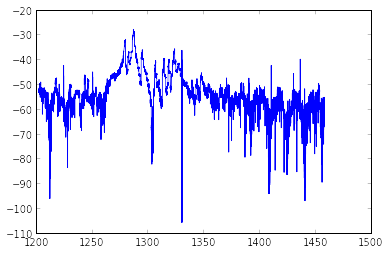

In [42]:
plot(swp.freqs,20*np.log10(np.abs(swp.data)))

In [43]:
d2 = swp.data

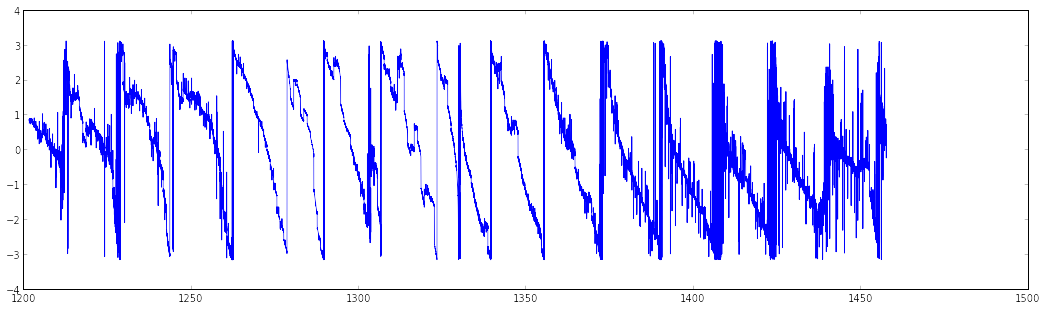

In [44]:
figure(figsize=(18,5))
d2 = swp.data
d2 = d2*np.exp(-31.36j*2*np.pi*(swp.freqs)-1j)
plot(swp.freqs,np.angle(d2))
#xlim(820,930)
#ylim(-3,0)

In [45]:
orig= np.load('/home/gjones/2015-07-01-starcryo-nevins-initial-sweep.npz')

In [46]:
orig.keys()

['lo', 'freq', 'data']

In [47]:
def fixit(d):
    d[::32] = np.nan
    d[2::32] = np.nan
    d[30::32] = np.nan
    return d

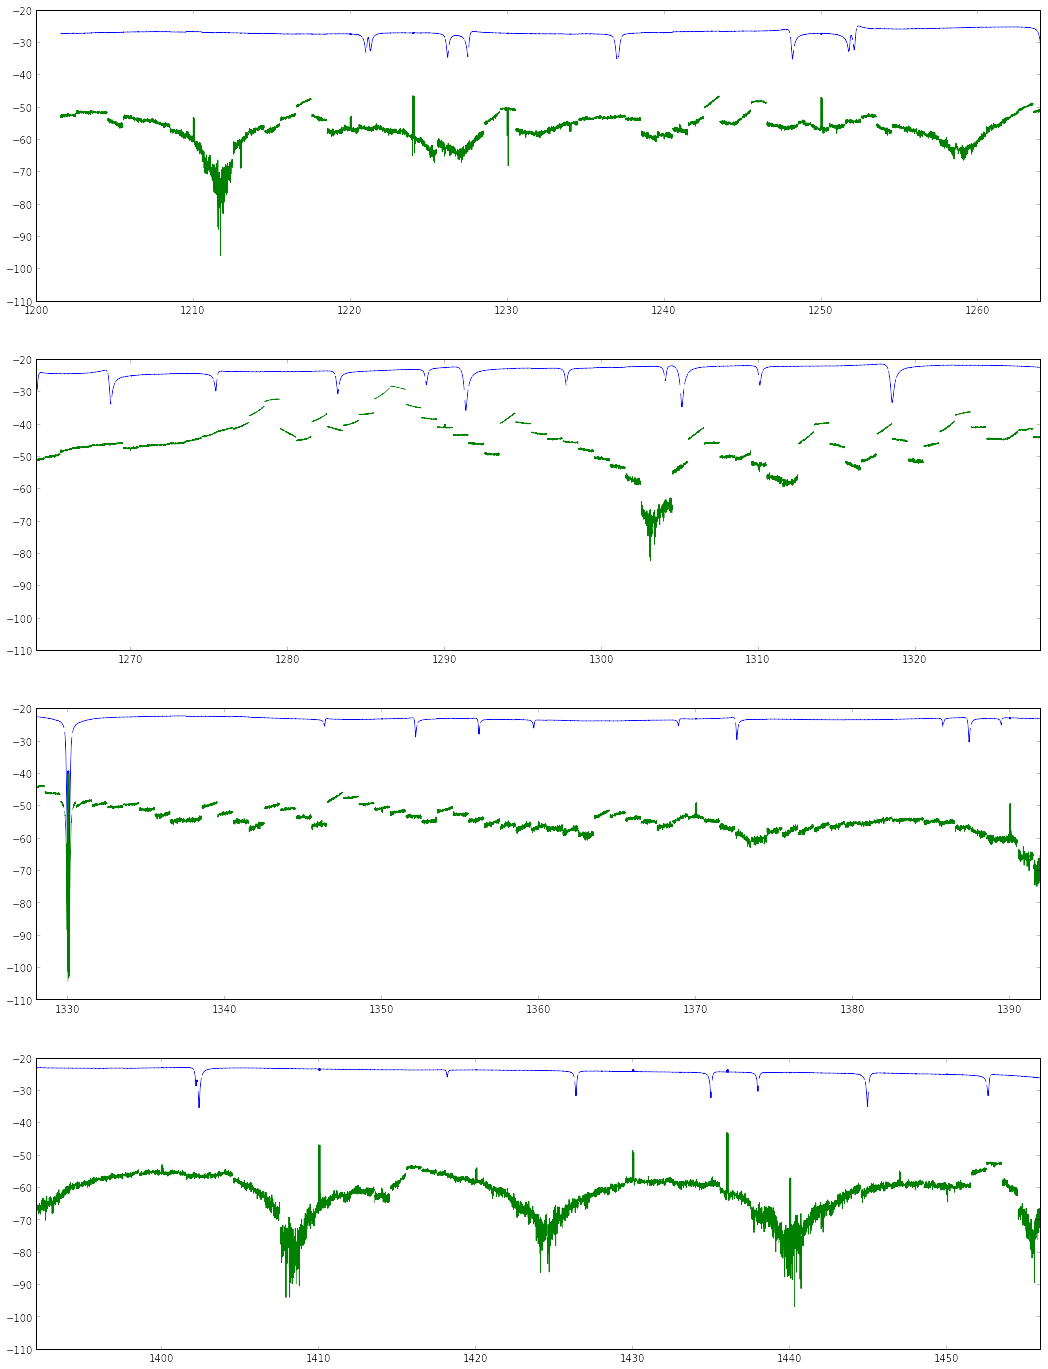

In [48]:
fig,axs = subplots(4,1,figsize=(18,6*4))
bw = swp.freqs.ptp()
for k in range(4):
    ax = axs[k]
    ax.plot(orig['freq'],20*np.log10(abs(fixit(orig['data']))))
    ax.plot(swp.freqs,20*np.log10(abs(fixit(swp.data))))
    #ax.set_ylim(-40,-20)
    ax.set_xlim(1200+k*bw/4,1200+(k+1)*bw/4)

    #xlim(1310,1430)

In [13]:
ri.set_dac_atten(0)
freqs = []
data = []
for lo in [830.,1030.,1230.,1430.,1630.]:
    ri.set_lo(lo)
    swp = kid_readout.utils.sweeps.do_prepared_sweep(ri,loopback=False,nchan_per_step=32)
    freqs.append(swp.freqs)
    data.append(swp.data)

detected mcnt overflow None 819515 0 65536 0 928 819515
detected mcnt overflow None 426284 0 65536 0 688 426284
detected mcnt overflow None 360733 0 65536 0 240 360733
detected mcnt overflow None 557326 0 65536 0 16 557326
detected mcnt overflow None 1016176 0 65536 0 512 1016176
detected mcnt overflow None 426337 0 65536 0 400 426337
detected mcnt overflow None 295250 0 65536 0 112 295250
detected mcnt overflow None 98626 0 65536 0 928 98626
detected mcnt overflow None 557363 0 65536 0 320 557363
detected mcnt overflow None 491797 0 65536 0 752 491797
detected mcnt overflow None 33030 0 65536 0 192 33030
detected mcnt overflow None 885095 0 65536 0 848 885095
detected mcnt overflow None 688472 0 65536 0 320 688472
detected mcnt overflow None 753978 0 65536 0 112 753978
detected mcnt overflow None 885034 0 65536 0 912 885034
detected mcnt overflow None 426331 0 65536 0 208 426331
detected mcnt overflow None 360764 0 65536 0 848 360764
detected mcnt overflow None 98605 0 65536 0 368 986

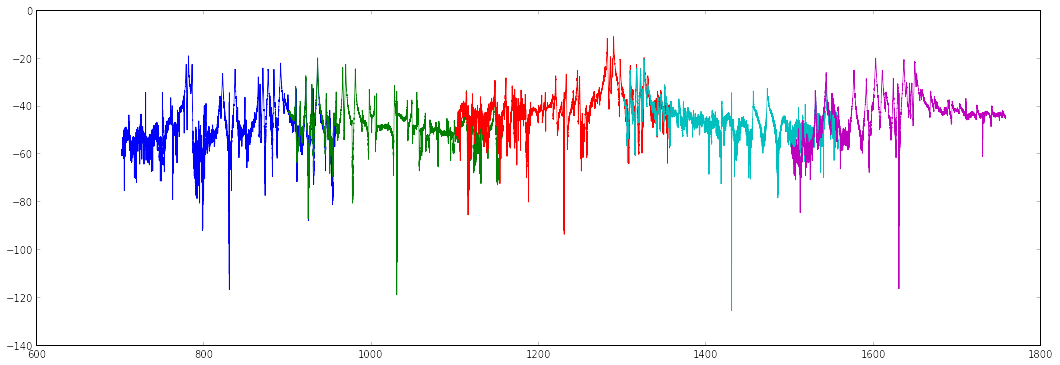

In [14]:
figure(figsize=(18,6))
for f,d in zip(freqs,data):
    plot(f,20*np.log10(np.abs(d)))

In [ ]:
np.savez('/home/gjones/2015-07-16-asu-dense-initial-sweep.npz',freq = np.vstack(freqs),data = np.vstack(data))

In [52]:
f.shape

(32768,)

In [53]:
d.shape

(32768,)

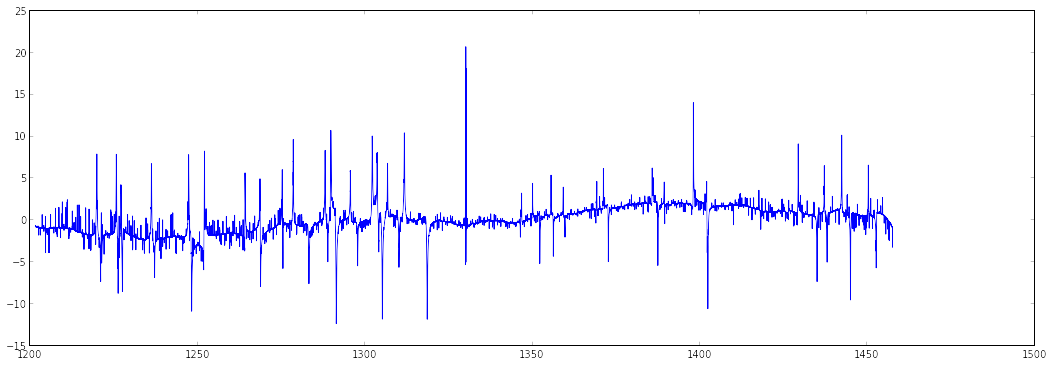

In [40]:
figure(figsize=(18,6))
plot(orig['freq'],20*np.log10(abs(orig['data']))-20*np.log10(abs(swp.data)))
#plot(swp.freqs,20*np.log10(abs(swp.data)))
#ylim(-40,-20)
#xlim(1310,1430)

In [24]:
swp2 = kid_readout.utils.sweeps.do_prepared_sweep(ri,loopback=False,nchan_per_step=32)

detected mcnt overflow None 295227 0 65536 0 576 295227
detected mcnt overflow None 426269 0 65536 0 368 426269
detected mcnt overflow None 557438 0 65536 0 512 557438
detected mcnt overflow None 950639 0 65536 0 240 950639
detected mcnt overflow None 688464 0 65536 0 576 688464
detected mcnt overflow None 753970 0 65536 0 544 753970
detected mcnt overflow None 229666 0 65536 0 1008 229666
detected mcnt overflow None 491795 0 65536 0 288 491795
detected mcnt overflow None 426244 0 65536 0 816 426244
detected mcnt overflow None 98677 0 65536 0 112 98677
detected mcnt overflow None 885093 0 65536 0 608 885093
detected mcnt overflow None 164167 0 65536 0 576 164167
detected mcnt overflow None 164121 0 65536 0 384 164121
detected mcnt overflow None 360811 0 65536 0 544 360811


(-40, -20)

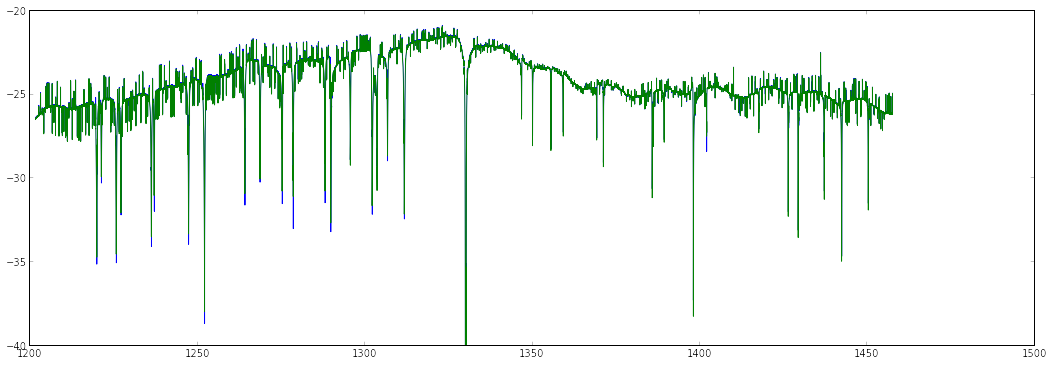

In [32]:
figure(figsize=(18,6))
plot(swp.freqs,20*np.log10(abs(swp.data)))
plot(swp2.freqs,20*np.log10(abs(swp2.data)))
ylim(-40,-20)
#xlim(1400,1403)

In [45]:
swp3 = kid_readout.utils.sweeps.do_prepared_sweep(ri,loopback=False,nchan_per_step=32)

detected mcnt overflow None 753979 0 65536 0 240 753979
detected mcnt overflow None 557356 0 65536 0 800 557356
detected mcnt overflow None 164109 0 65536 0 384 164109
detected mcnt overflow None 622959 0 65536 0 176 622959
detected mcnt overflow None 295263 0 65536 0 656 295263
detected mcnt overflow None 557377 0 65536 0 704 557377
detected mcnt overflow None 622882 0 65536 0 432 622882
detected mcnt overflow None 950532 0 65536 0 96 950532
detected mcnt overflow None 950644 0 65536 0 880 950644
detected mcnt overflow None 754006 0 65536 0 288 754006
detected mcnt overflow None 1016134 0 65536 0 624 1016134
detected mcnt overflow None 557336 0 65536 0 352 557336
detected mcnt overflow None 688393 0 65536 0 832 688393
detected mcnt overflow None 754026 0 65536 0 336 754026
detected mcnt overflow None 360795 0 65536 0 672 360795


(1340, 1370)

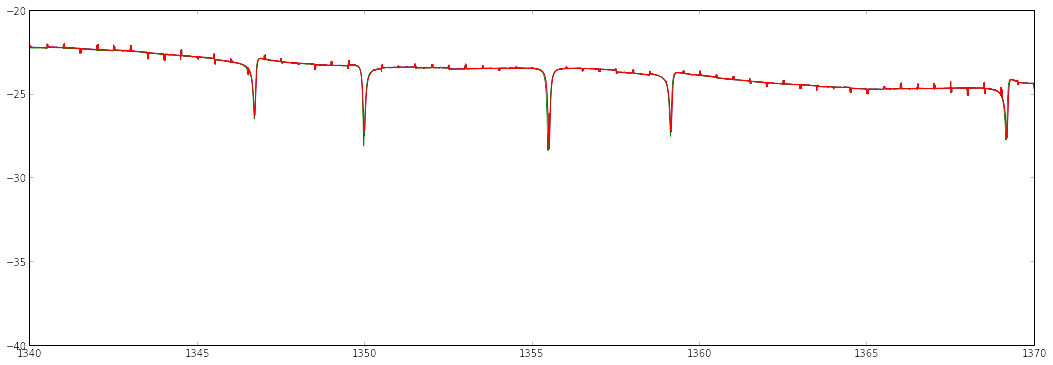

In [46]:
figure(figsize=(18,6))
plot(swp.freqs,20*np.log10(abs(swp.data)))
plot(swp2.freqs,20*np.log10(abs(swp2.data)))
plot(swp3.freqs,20*np.log10(abs(swp3.data)))
ylim(-40,-20)
xlim(1340,1370)

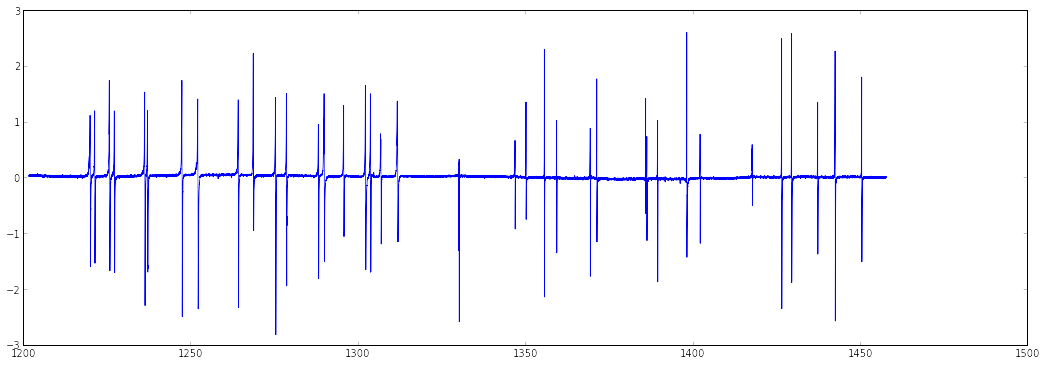

In [28]:
figure(figsize=(18,6))
plot(swp.freqs,20*np.log10(abs(swp.data))-20*np.log10(abs(swp2.data)))
#plot(swp2.freqs,20*np.log10(abs(swp2.data)))
#ylim(-40,-20)
#xlim(1310,1430)

In [47]:
import kid_readout.equipment.agilent_33220

In [50]:
fg = kid_readout.equipment.agilent_33220.FunctionGenerator(addr=('192.168.1.145', 5025))

In [51]:
fg.set_dc_voltage(1.8)

In [52]:
fg.enable_output(True)

In [53]:
swp4 = kid_readout.utils.sweeps.do_prepared_sweep(ri,loopback=False,nchan_per_step=32)

detected mcnt overflow None 98587 0 65536 0 112 98587
detected mcnt overflow None 688396 0 65536 0 80 688396
detected mcnt overflow None 491901 0 65536 0 96 491901
detected mcnt overflow None 426334 0 65536 0 848 426334
detected mcnt overflow None 819535 0 65536 0 720 819535
detected mcnt overflow None 622912 0 65536 0 592 622912
detected mcnt overflow None 98609 0 65536 0 272 98609
detected mcnt overflow None 295187 0 65536 0 800 295187
detected mcnt overflow None 819460 0 65536 0 656 819460
detected mcnt overflow None 885109 0 65536 0 352 885109
detected mcnt overflow None 33110 0 65536 0 304 33110
detected mcnt overflow None 688440 0 65536 0 192 688440
detected mcnt overflow None 98600 0 65536 0 960 98600
detected mcnt overflow None 753930 0 65536 0 384 753930
detected mcnt overflow None 33098 0 65536 0 896 33098


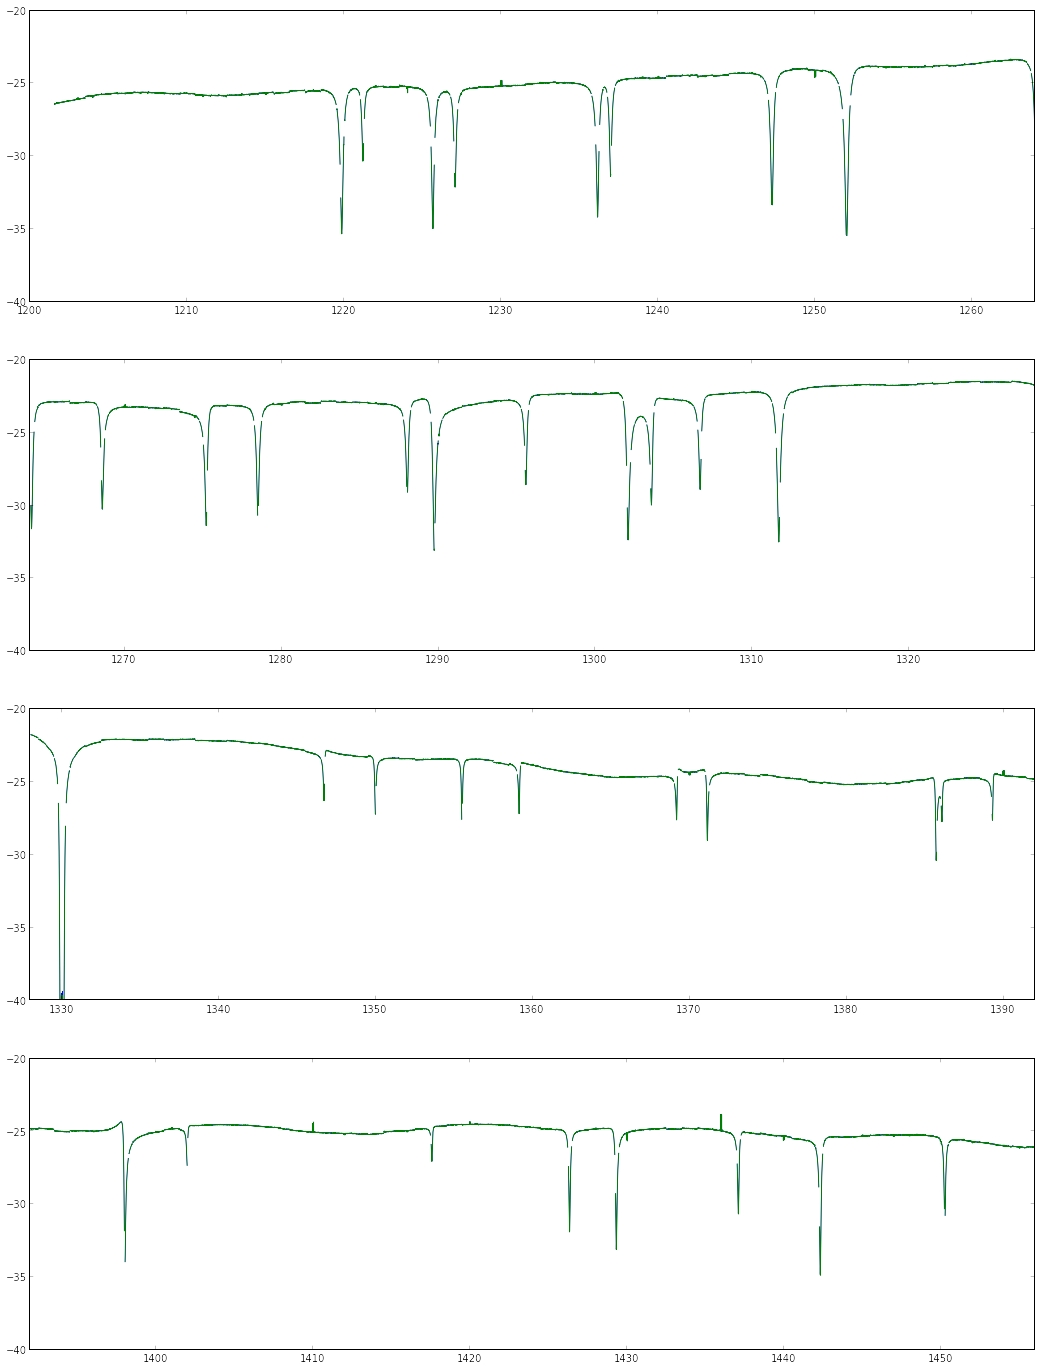

In [56]:
fig,axs = subplots(4,1,figsize=(18,6*4))
bw = swp.freqs.ptp()
for k in range(4):
    ax = axs[k]
    ax.plot(swp3.freqs,20*np.log10(abs(fixit(swp3.data))))
    ax.plot(swp4.freqs,20*np.log10(abs(fixit(swp4.data))))
    ax.set_ylim(-40,-20)
    ax.set_xlim(1200+k*bw/4,1200+(k+1)*bw/4)

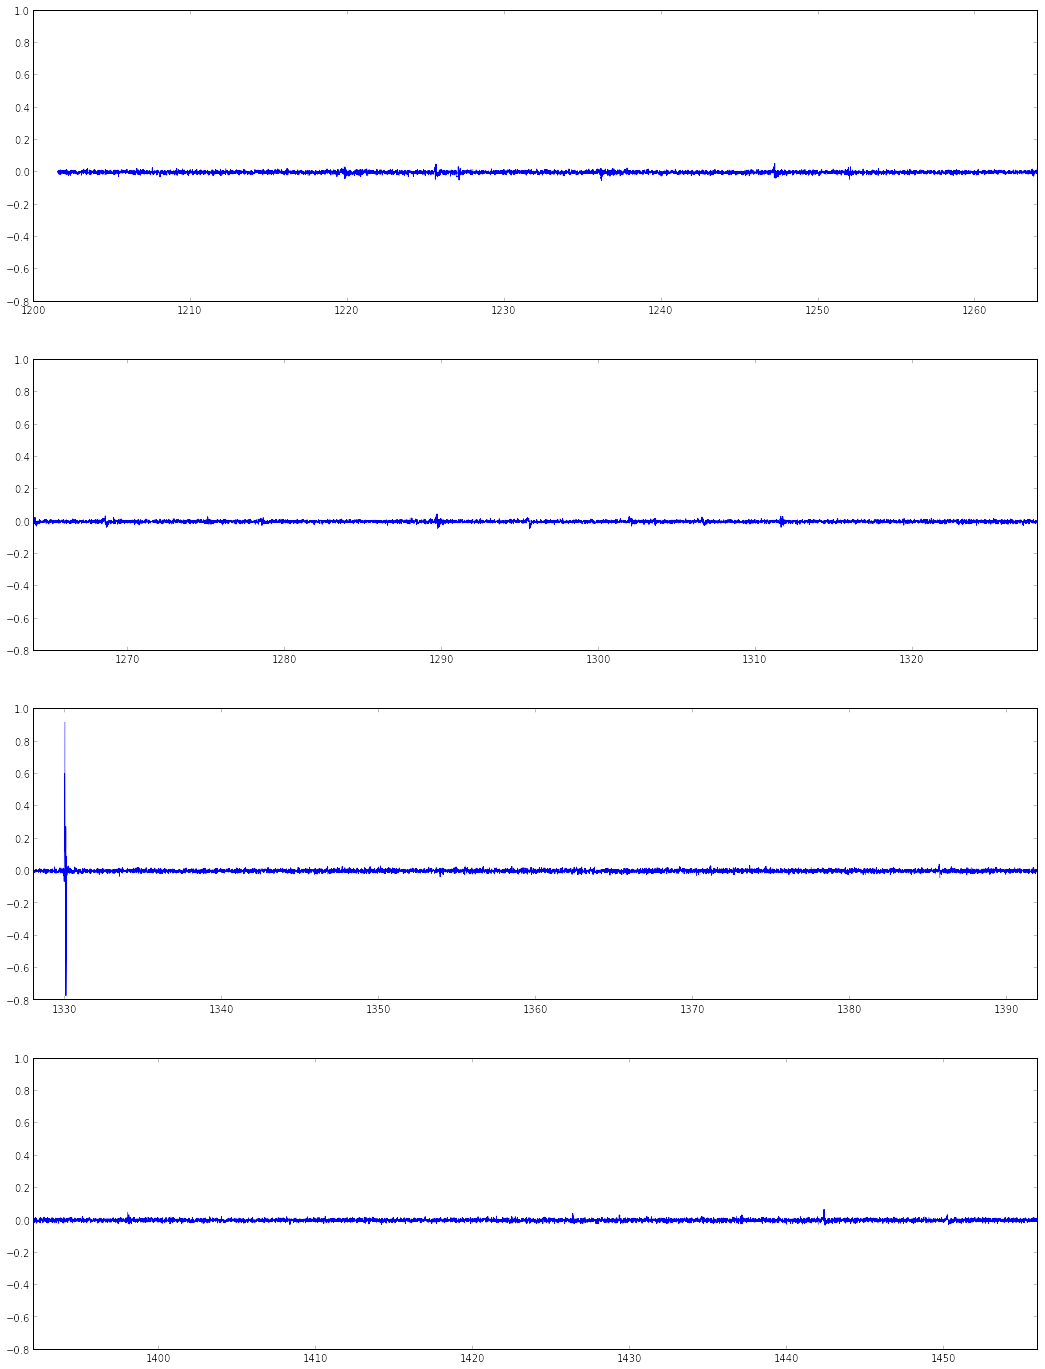

In [57]:
fig,axs = subplots(4,1,figsize=(18,6*4))
bw = swp.freqs.ptp()
for k in range(4):
    ax = axs[k]
    ax.plot(swp3.freqs,20*np.log10(abs(fixit(swp3.data)))-20*np.log10(abs(fixit(swp4.data))))
#   ax.plot(swp4.freqs,20*np.log10(abs(fixit(swp4.data))))
#   ax.set_ylim(-40,-20)
    ax.set_xlim(1200+k*bw/4,1200+(k+1)*bw/4)

In [55]:
fg.enable_output(False)

In [58]:
fg.set_dc_voltage(2.0)
fg.enable_output(True)

In [59]:
swp5 = kid_readout.utils.sweeps.do_prepared_sweep(ri,loopback=False,nchan_per_step=32)

detected mcnt overflow None 164187 0 65536 0 592 164187
detected mcnt overflow None 950604 0 65536 0 544 950604
detected mcnt overflow None 753981 0 65536 0 96 753981
detected mcnt overflow None 1016110 0 65536 0 960 1016110
detected mcnt overflow None 98591 0 65536 0 512 98591
detected mcnt overflow None 885104 0 65536 0 352 885104
detected mcnt overflow None 98642 0 65536 0 496 98642
detected mcnt overflow None 164147 0 65536 0 128 164147
detected mcnt overflow None 688420 0 65536 0 624 688420
detected mcnt overflow None 950533 0 65536 0 256 950533
detected mcnt overflow None 33142 0 65536 0 992 33142
detected mcnt overflow None 98663 0 65536 0 320 98663
detected mcnt overflow None 98647 0 65536 0 720 98647
detected mcnt overflow None 33081 0 65536 0 416 33081
detected mcnt overflow None 622859 0 65536 0 192 622859


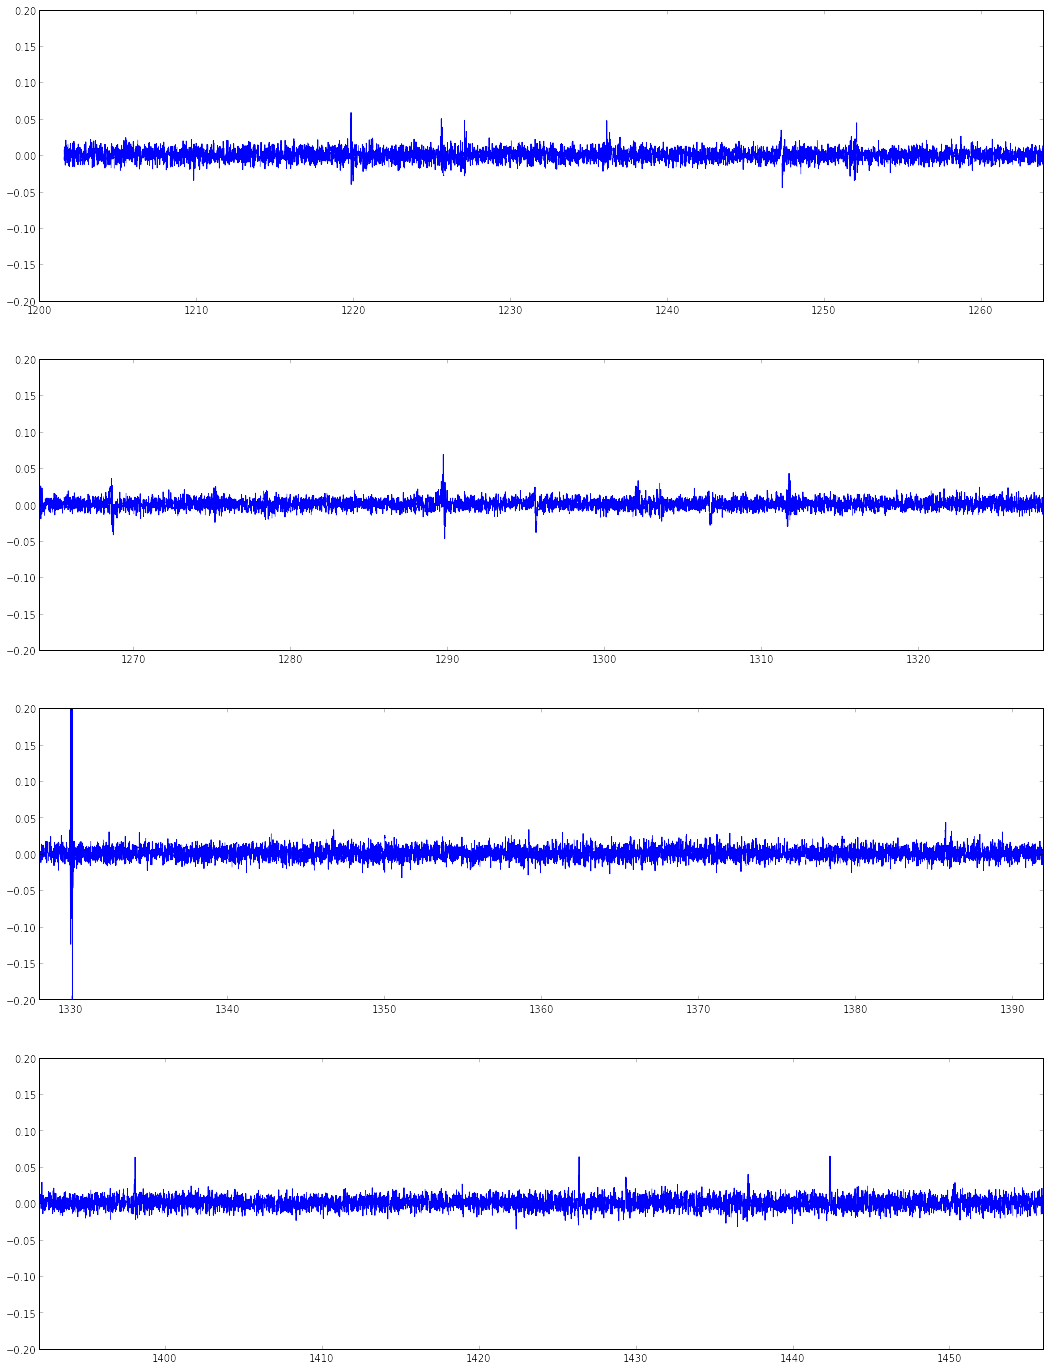

In [63]:
fig,axs = subplots(4,1,figsize=(18,6*4))
bw = swp.freqs.ptp()
for k in range(4):
    ax = axs[k]
    ax.plot(swp3.freqs,20*np.log10(abs(fixit(swp3.data)))-20*np.log10(abs(fixit(swp5.data))))
#   ax.plot(swp4.freqs,20*np.log10(abs(fixit(swp4.data))))
    ax.set_ylim(-.2,.2)
    ax.set_xlim(1200+k*bw/4,1200+(k+1)*bw/4)

In [61]:
fg.enable_output(False)

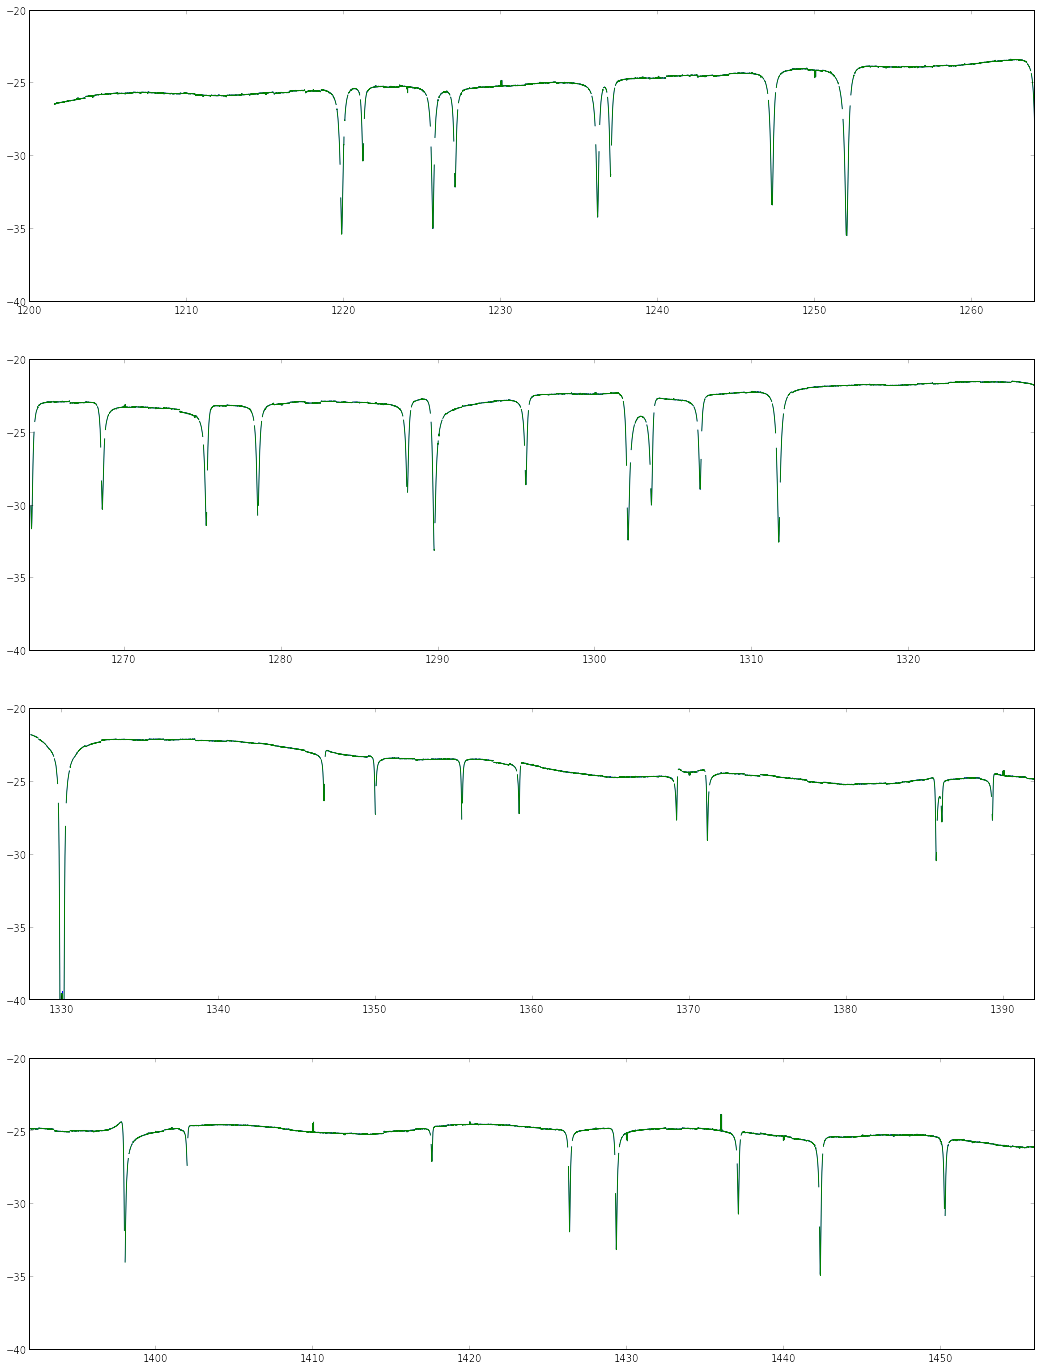

In [62]:

fig,axs = subplots(4,1,figsize=(18,6*4))
bw = swp.freqs.ptp()
for k in range(4):
    ax = axs[k]
    ax.plot(swp3.freqs,20*np.log10(abs(fixit(swp3.data))))
    ax.plot(swp5.freqs,20*np.log10(abs(fixit(swp5.data))))
    ax.set_ylim(-40,-20)
    ax.set_xlim(1200+k*bw/4,1200+(k+1)*bw/4)

(1346.5, 1347)

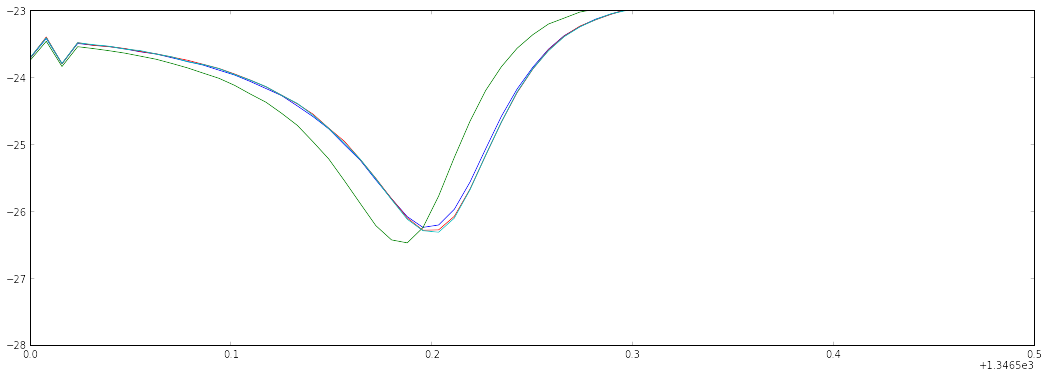

In [83]:
figure(figsize=(18,6))
plot(swp.freqs,20*np.log10(abs(swp.data)))
plot(swp2.freqs,20*np.log10(abs(swp2.data)))
plot(swp3.freqs,20*np.log10(abs(swp3.data)))
plot(swp5.freqs,20*np.log10(abs(swp5.data)))
ylim(-28,-23)
xlim(1346.5,1347)

In [71]:
idx = np.searchsorted(swp5.freqs,1346.7)

In [72]:
d = swp5.blocks[idx]

In [76]:
d.lo+d.fs*d.tone*1.0/d.nsamp

1346.703125

In [77]:
d.data.shape

(8192,)

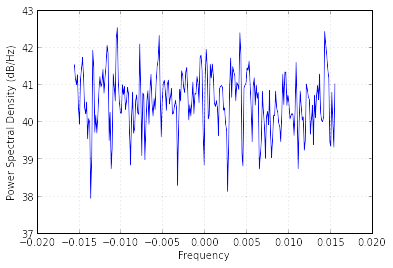

In [80]:
blah = psd(d.data-d.data.mean(),Fs=d.fs/2**14.)

In [91]:
f5 = fixit(swp5.data)
fr5 = swp5.freqs[np.isfinite(f5)]
f5 = f5[np.isfinite(f5)]

(2000, 5000)

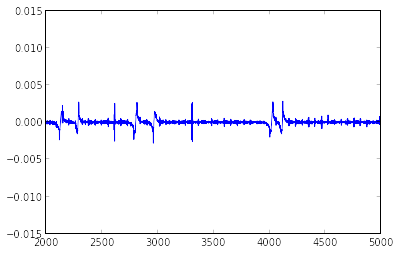

In [88]:
plot(np.diff(np.abs(f5)))
xlim(2000,5000)

In [89]:
np.sort?

In [112]:
def find_resonators(freqs,data,max_res=50,min_spacing=0.5):
    order = np.argsort(data)
    resonators = np.zeros((max_res,))
    next_index = 0
    for k,this_freq in enumerate(freqs[order]):
        if np.abs(resonators-this_freq).min() >= min_spacing:
            print "found one",next_index,this_freq
            resonators[next_index] = this_freq
            next_index +=1
            if next_index >= max_res:
                break
    return resonators

In [113]:
res = find_resonators(fr5,np.abs(f5))

found one 0 1330.0390625
found one 1 1252.0078125
found one 2 1219.8359375
found one 3 1225.640625
found one 4 1442.3203125
found one 5 1398.0078125
found one 6 1236.140625
found one 7 1247.2421875
found one 8 1429.3203125
found one 9 1289.71875
found one 10 1311.6796875
found one 11 1302.078125
found one 12 1227.0546875
found one 13 1426.34375
found one 14 1264.0625
found one 15 1450.2578125
found one 16 1236.9609375
found one 17 1275.1953125
found one 18 1278.4921875
found one 19 1437.1015625
found one 20 1385.7109375
found one 21 1221.1796875
found one 22 1268.578125
found one 23 1303.5625
found one 24 1288.0078125
found one 25 1371.125
found one 26 1306.671875
found one 27 1295.5625
found one 28 1355.4921875
found one 29 1369.1640625
found one 30 1389.2890625
found one 31 1401.9765625
found one 32 1349.9765625
found one 33 1359.1328125
found one 34 1417.5703125
found one 35 1201.5078125
found one 36 1346.703125
found one 37 1202.0234375
found one 38 1202.53125
found one 39 1456.656

In [104]:
fr5

array([ 1201.5078125,  1201.5234375,  1201.53125  , ...,  1457.46875  ,
        1457.4765625,  1457.4921875])

In [108]:
res.sort()

(-40, -20)

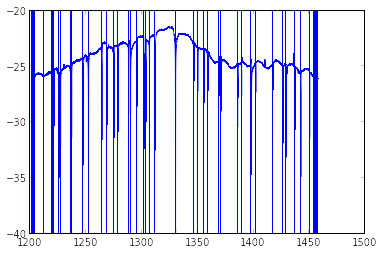

In [115]:
plot(fr5,20*np.log10(np.abs(f5)))
ax = gca()
for k in res:
    ax.axvline(k)
ylim(-40,-20)

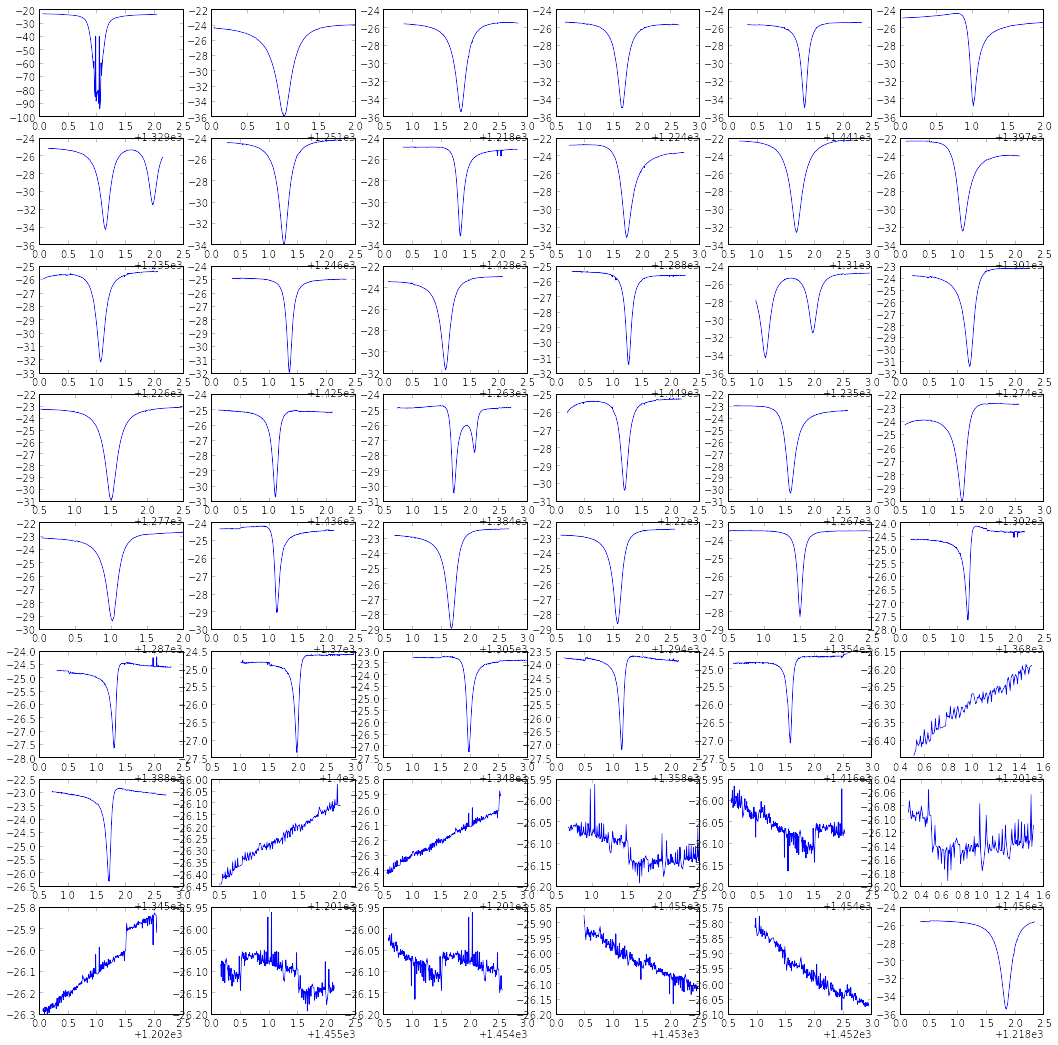

In [118]:
fig,axs = subplots(8,6,figsize=(18,18))
for k in range(48):
    ax = axs.flatten()[k]
    f0 = res[k]
    mask = np.abs(fr5-f0) < 1.
    ax.plot(fr5[mask],20*np.log10(np.abs(f5[mask])))

In [120]:
selection = res[1:34]
selection[5] = np.nan
selection = selection[np.isfinite(selection)]

In [121]:
selection.shape

(32,)

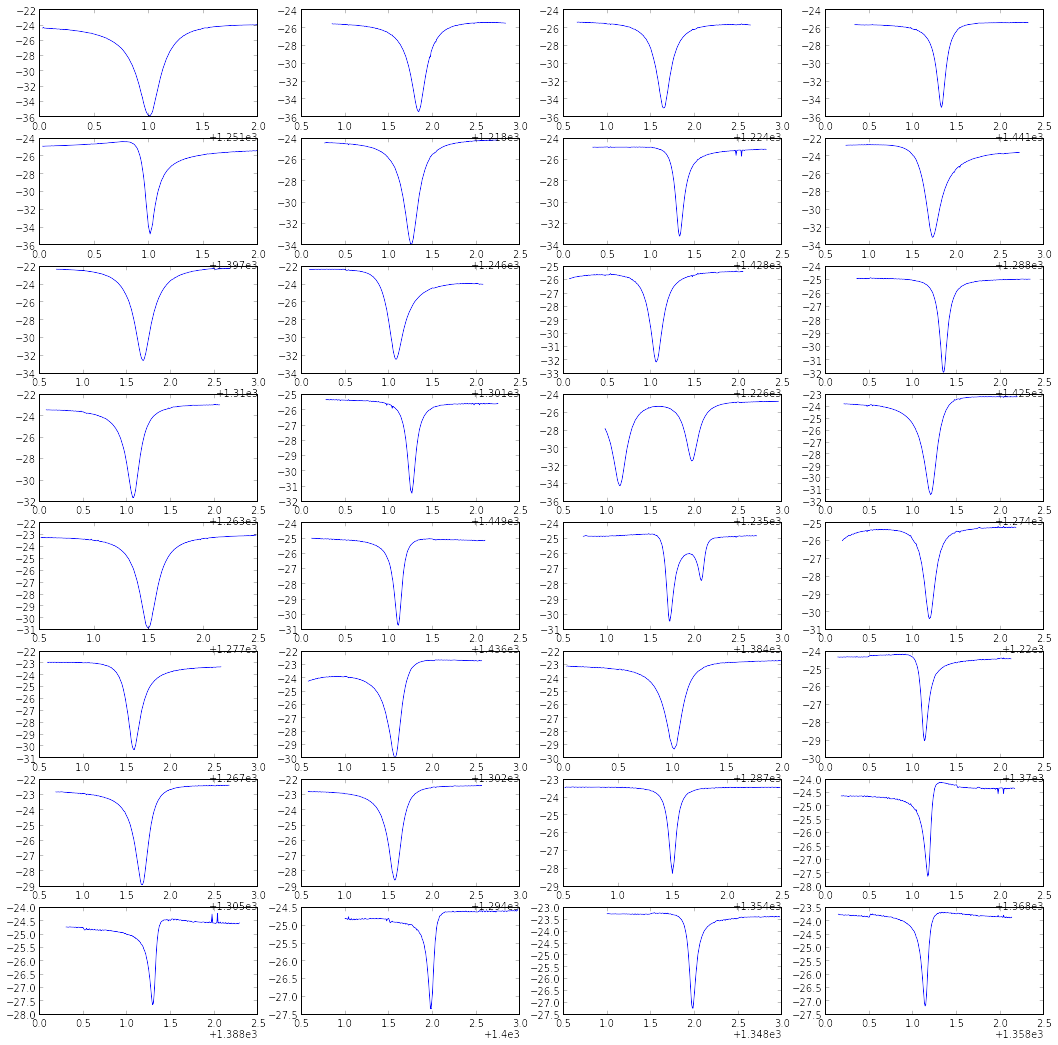

In [122]:
fig,axs = subplots(8,4,figsize=(18,18))
for k in range(32):
    ax = axs.flatten()[k]
    f0 = selection[k]
    mask = np.abs(fr5-f0) < 1.
    ax.plot(fr5[mask],20*np.log10(np.abs(f5[mask])))

In [123]:
selection.sort()

In [124]:
selection

array([ 1219.8359375,  1221.1796875,  1225.640625 ,  1227.0546875,
        1236.9609375,  1247.2421875,  1252.0078125,  1264.0625   ,
        1268.578125 ,  1275.1953125,  1278.4921875,  1288.0078125,
        1289.71875  ,  1295.5625   ,  1302.078125 ,  1303.5625   ,
        1306.671875 ,  1311.6796875,  1349.9765625,  1355.4921875,
        1359.1328125,  1369.1640625,  1371.125    ,  1385.7109375,
        1389.2890625,  1398.0078125,  1401.9765625,  1426.34375  ,
        1429.3203125,  1437.1015625,  1442.3203125,  1450.2578125])